## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
4. How should performance be measured?

**Problem**: Categorizing clothing product images to verify if they align with their corresponding categories.

**Objective**: Improve inventory management and enhance customer experience by ensuring product images accurately 
represent their assigned categories.

**Framing the problem**: Since labels are unavailable, the problem can be framed as an unsupervised learning task:
- *Clustering*: Use neural networks like autoencoders to group similar images and identify potential mismatches within clusters.
- *Representation Learning*: Extract features using convolutional neural networks (CNNs) and perform clustering in the feature space.

**Performance**: ??? (How should performance be measured?)

### 2. Get the data

1. Find and document where you can get the data from
2. Get the data

In [82]:
import pandas as pd
import os

# Load the styles.csv file, skipping problematic lines
styles_df = pd.read_csv('fashion-dataset/styles.csv', on_bad_lines='skip')

styles_df.head()


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


3. Check the size and type of data (time series, geographical etc)

In [83]:
# Create a new DataFrame with only 'masterCategory' and 'id' columns
new_df = styles_df[['subCategory', 'id']].copy()

# Define the path to the images directory
images_dir = 'fashion-dataset/images'

# Create a new column 'image_path' in new_df with the corresponding image paths
new_df['image_path'] = new_df['id'].apply(lambda x: os.path.join(images_dir, f"{x}.jpg"))

# Display the first few rows of the updated DataFrame
new_df.head()

,subCategory,id,image_path
0,Topwear,15970,fashion-dataset/images\15970.jpg
1,Bottomwear,39386,fashion-dataset/images\39386.jpg
2,Watches,59263,fashion-dataset/images\59263.jpg
3,Bottomwear,21379,fashion-dataset/images\21379.jpg
4,Topwear,53759,fashion-dataset/images\53759.jpg


In [84]:
# Filter the DataFrame based on the 'subCategory' values
filtered_df = new_df[new_df['subCategory'].isin(['Topwear', 'Bottomwear', 'Watches', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Jewellery', 'Eyewear',
       'Scarves', 'Dress', 'Headwear', 'Ties', 'Accessories', 'Gloves'])]

In [85]:
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

# Function to load images from file paths
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path).resize((224, 224))  # Resize images to a fixed size
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)

# Sample 2000 objects from the filtered dataset
sampled_df = filtered_df.sample(n=5000, random_state=42)

# Extract image paths and labels
image_paths = sampled_df['image_path'].values
labels = sampled_df['subCategory'].values

# Split the data into training and testing sets
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Load the images
train_images = load_images(train_paths)
test_images = load_images(test_paths)

# Check the shapes of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (4000, 224, 224, 3)
Test images shape: (1000, 224, 224, 3)
Train labels shape: (4000,)
Test labels shape: (1000,)


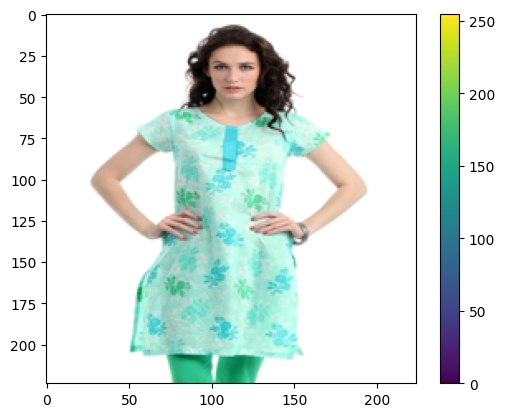

In [86]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [87]:
train_images = train_images / 255.0

test_images = test_images / 255.0

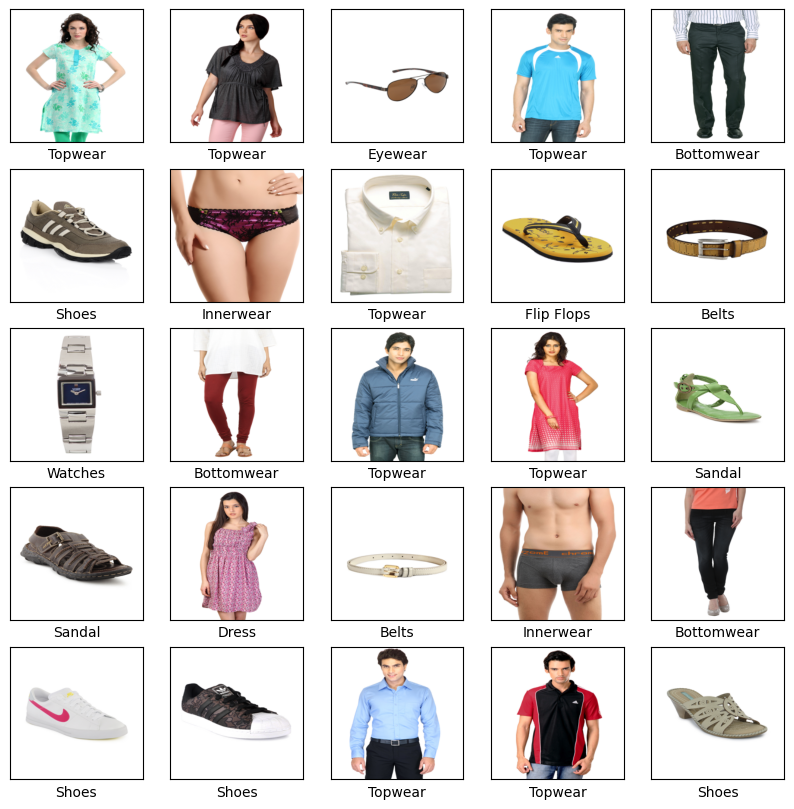

In [88]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

In [89]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Combine train and test labels to fit the label encoder on all possible labels
all_labels = list(train_labels) + list(test_labels)

# Fit the label encoder and transform the labels to numerical values
label_encoder.fit(all_labels)
train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Get the mapping of label numbers to original labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

"Label mapping:", label_mapping

('Label mapping:',
 {np.str_('Accessories'): np.int64(0),
  np.str_('Bags'): np.int64(1),
  np.str_('Belts'): np.int64(2),
  np.str_('Bottomwear'): np.int64(3),
  np.str_('Dress'): np.int64(4),
  np.str_('Eyewear'): np.int64(5),
  np.str_('Flip Flops'): np.int64(6),
  np.str_('Gloves'): np.int64(7),
  np.str_('Headwear'): np.int64(8),
  np.str_('Innerwear'): np.int64(9),
  np.str_('Jewellery'): np.int64(10),
  np.str_('Sandal'): np.int64(11),
  np.str_('Scarves'): np.int64(12),
  np.str_('Shoes'): np.int64(13),
  np.str_('Ties'): np.int64(14),
  np.str_('Topwear'): np.int64(15),
  np.str_('Watches'): np.int64(16)})

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),  # Start with the Input layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(17)  # Assuming 17 output classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels_encoded, epochs=20)

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8666 - loss: 8.3312
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8604 - loss: 7.2106
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8290 - loss: 12.1038
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8708 - loss: 7.3243
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8553 - loss: 8.5779
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8815 - loss: 6.5631
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8515 - loss: 10.3014
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8821 - loss: 7.3009
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8565 - loss: 8.4418
Epoch 10/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9022 - loss: 5.3740
Epoch 11/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8629 - loss: 9.8880
Epoch 12/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/st

In [106]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_encoded, verbose=2)

print('\nTest accuracy:', test_acc)

32/32 - 0s - 4ms/step - accuracy: 0.8470 - loss: 12.6795

Test accuracy: 0.847000002861023


In [107]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


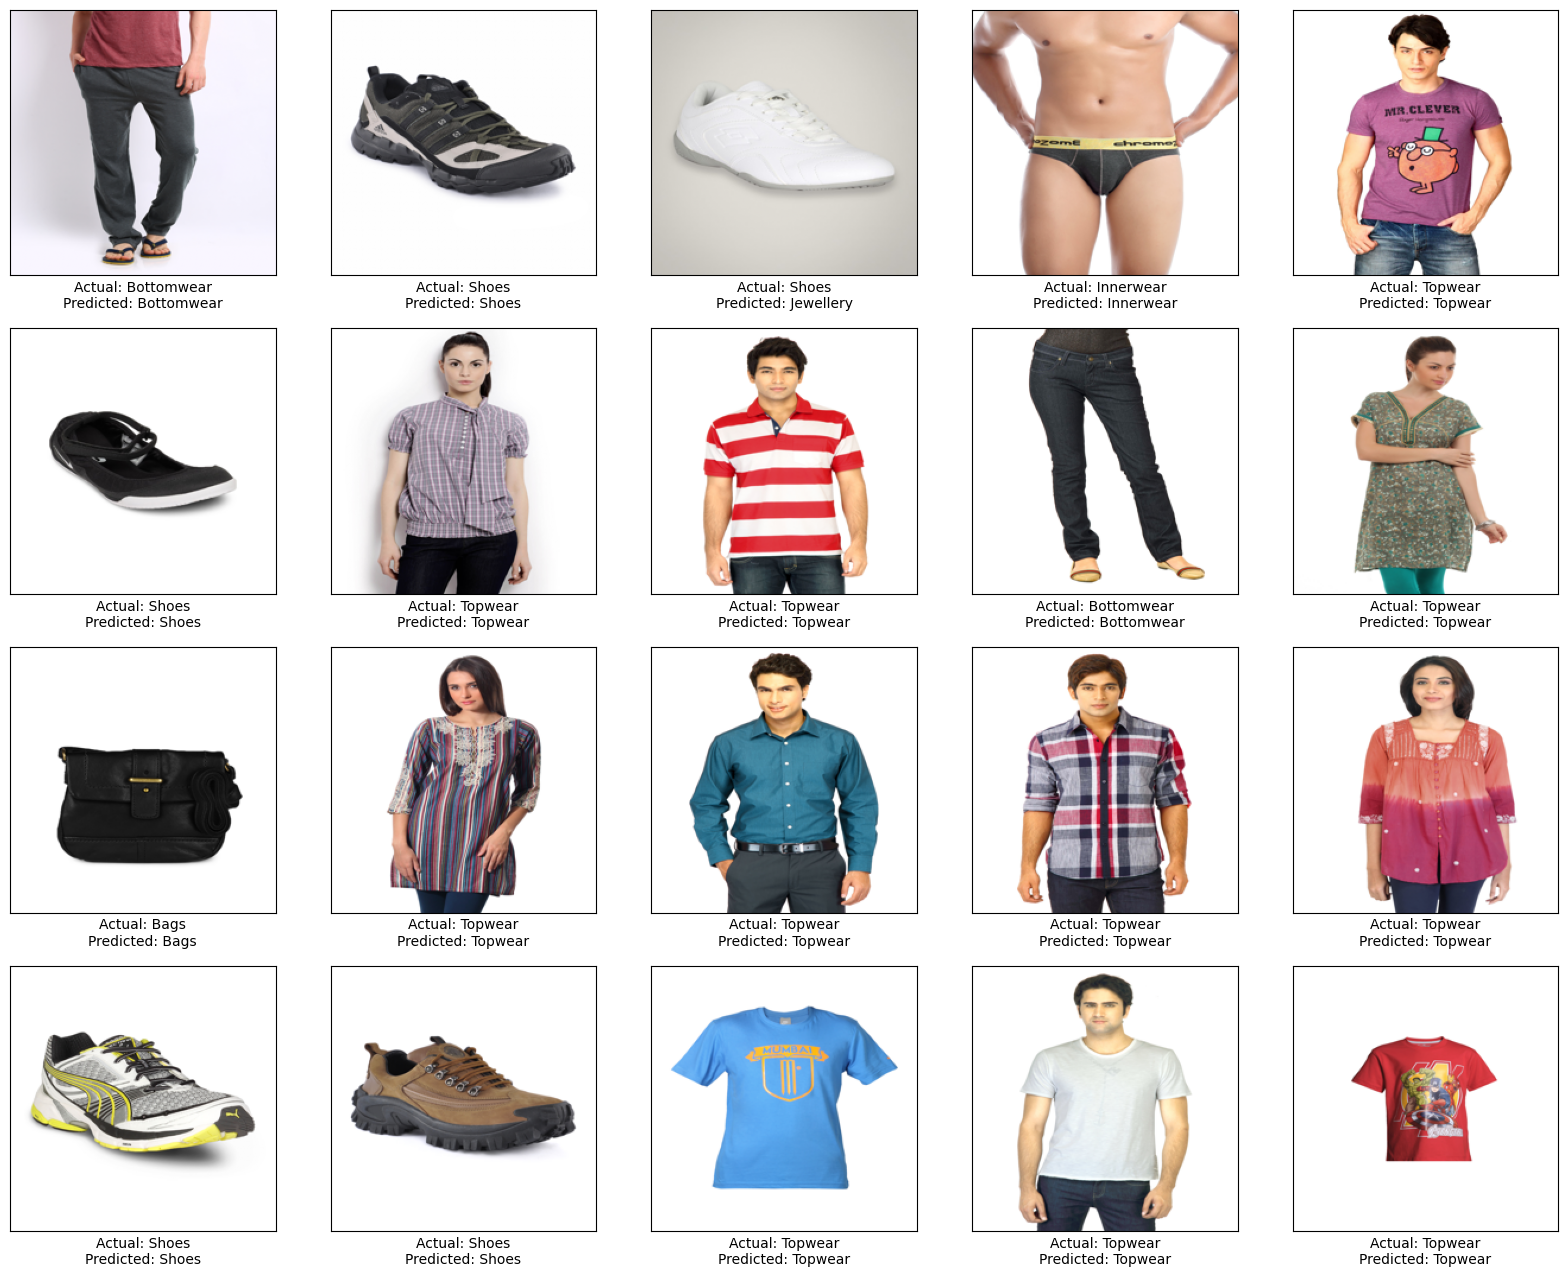

In [108]:
import matplotlib.pyplot as plt

# Define class names based on the label mapping
class_names = list(label_mapping.keys())

def plot_image_predictions(images, labels, predictions, class_names, num_images=10):
    plt.figure(figsize=(20, 20))
    for i in range(min(num_images, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        actual_label = class_names[labels[i]]
        predicted_label = class_names[np.argmax(predictions[i])]
        plt.xlabel(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.show()

# Plot the first 10 test images with their actual and predicted labels
plot_image_predictions(test_images, test_labels_encoded, predictions, class_names, num_images=20)

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.